In [2]:
import pandas as pd

In [3]:
temps = pd.read_csv("CSVs/temps.csv")

In [4]:
temps.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [5]:
features = temps

In [6]:
features.shape

(348, 12)

In [7]:
features.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [8]:
features = features[['year','month', 'day', 'week', 'temp_2', 'temp_1', 'average', 'actual', 'friend']]

In [9]:
features.shape

(348, 9)

In [10]:
features = pd.get_dummies(features)
features.head(5)

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [11]:
print('Shape of features after one-hot encoding:', features.shape)

('Shape of features after one-hot encoding:', (348, 15))


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
features.head()

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [13]:
import numpy as np

labels = np.array(features['actual'])

features = features.drop('actual', axis = 1)

features_list = list(features.columns)

In [14]:
X= features
y = labels

In [15]:
X.describe()

,year,month,day,temp_2,temp_1,average,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,60.034483,0.143678,0.140805,0.143678,0.140805,0.140805,0.149425,0.140805
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,15.626179,0.351268,0.348321,0.351268,0.348321,0.348321,0.357021,0.348321
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,47.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
X_list = list(X.dtypes.index)

In [17]:
numvar = list(X.dtypes.index)

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix

In [19]:
model = RandomForestRegressor(n_estimators=100,
                             oob_score=True,
                             random_state=42,
                             )
model.fit(X[numvar], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [20]:
model.oob_score_

0.8239505079015359

In [21]:
y_oob = model.oob_prediction_


In [22]:
features = np.array(features)

In [23]:
importances = model.feature_importances_.tolist()



In [24]:
# most important features: temp_1 and average
for i, x in enumerate(numvar):
    print i, ".", x, "=", importances[i]

0 . year = 0.0
1 . month = 0.0120843378151
2 . day = 0.0243676949035
3 . temp_2 = 0.0233372735865
4 . temp_1 = 0.523770873223
5 . average = 0.369974557354
6 . friend = 0.0246135834062
7 . week_Fri = 0.00311629011647
8 . week_Mon = 0.00470216747491
9 . week_Sat = 0.00298204553451
10 . week_Sun = 0.00398698710841
11 . week_Thurs = 0.00148957116189
12 . week_Tues = 0.00280624438908
13 . week_Wed = 0.0027683739263


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train_features,test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.25, random_state = 45)

In [27]:
# 261 observations, and 15 features, 261 train labels
train_features.shape, train_labels.shape

((261, 14), (261,))

In [28]:
# 87 test observations, and 15 features. (unseen by model) , 87 test predictions
test_features.shape, test_labels.shape

((87, 14), (87,))

In [29]:
X_list

['year',
 'month',
 'day',
 'temp_2',
 'temp_1',
 'average',
 'friend',
 'week_Fri',
 'week_Mon',
 'week_Sat',
 'week_Sun',
 'week_Thurs',
 'week_Tues',
 'week_Wed']

In [30]:
X_list.index('average')

5

In [31]:
# baseline prediction // or historical averages // what our model has been trained on
baseline_preds = test_features['average']

# baseline errors, and display avg baseline error
baseline_errors = abs(baseline_preds - test_labels)

In [32]:
print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees.')

('Average baseline error: ', 3.95, 'degrees.')


In [33]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 1000, random_state=45)

rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=45, verbose=0, warm_start=False)

In [34]:
# we can create models with different hyperparameters to try and boost performance
# to do this, we should try a few and evaluate them

rf_new = RandomForestRegressor(n_estimators = 100, criterion='mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf=1)

In [35]:
# make predictions on the test data
# use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [36]:
#calculate the absolute errors from the predictions
errors = abs(predictions - test_labels)
print 'Mean absolute error: ', round(np.mean(errors), 2), 'degrees'

Mean absolute error:  3.72 degrees


In [37]:
# calculate the mean absolute percentage error
mape = 100 * (errors/test_labels)

accuracy = 100 - np.mean(mape)

print 'Accuracy:', round(accuracy, 2), '%.'

Accuracy: 93.89 %.


In [38]:
# visualization
from sklearn.tree import export_graphviz
import pydot
import graphviz



In [40]:
# pull out one tree from the forest
tree = rf.estimators_[5]

# export the image to a dot file
export_graphviz(tree, out_file='tree.dot', feature_names= features_list, rounded=True, precision=1)



In [46]:
# use dot file to create a graph
(graph,) = pydot.graph_from_dot_file("tree.dot")

graph.write_png('tree.png')

True

In [41]:
# return the depth of this tree
print 'The depth of this tree is:', tree.tree_.max_depth

The depth of this tree is: 14


In [48]:
%%bash
open tree.png

In [42]:
# smaller tree for visual
rf_small = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)
rf_small.fit(train_features, train_labels)

#extract small tree 
tree_small = rf_small.estimators_[5]

#save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = features_list, rounded = True, precision=1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

graph.write_png('small_tree.png')

True

In [43]:
features_list

['year',
 'month',
 'day',
 'temp_2',
 'temp_1',
 'average',
 'friend',
 'week_Fri',
 'week_Mon',
 'week_Sat',
 'week_Sun',
 'week_Thurs',
 'week_Tues',
 'week_Wed']

In [44]:
# get numerical feature importances
importances = list(rf.feature_importances_)

feature_importances = [(feature, round(importance,2)) for feature, importance in zip(X_list, importances)]


# sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# print out the feature and importances
for pair in feature_importances:
    print 'Variable: {:20} Importance: {}'.format(*pair)

Variable: temp_1               Importance: 0.64
Variable: average              Importance: 0.25
Variable: month                Importance: 0.02
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: friend               Importance: 0.02
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


In [45]:
# new random forest with only the two most important features

rf_most_important = RandomForestRegressor(n_estimators = 1000, random_state=42)

# extract the two most important features
important_indices = [X_list.index('temp_1'), X_list.index('average')]
train_important = train_features[['temp_1', 'average', 'month']]
test_important = test_features[['temp_1', 'average', 'month']]

# train the random forest
rf_most_important.fit(train_important, train_labels)

# make predictions and determine the error
predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

print 'Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.'

mape = np.mean(100*(errors/test_labels))
accuracy = 100 - mape

print 'Accuracy:', round(accuracy,2), '%.'

Mean Absolute Error: 3.64 degrees.
Accuracy: 94.0 %.


Text(0.5,1,u'Variable Importances')

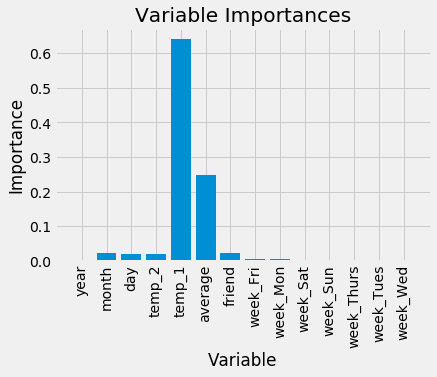

In [46]:
# visualizations 
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

# x locations for plotting
x_values = list(range(len(importances)))

# make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# tick marks for the x axis
plt.xticks(x_values, X_list, rotation='vertical')

# axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')
                

In [47]:
months = X[['month']]
days = X[['day']]
years = X[['year']]

In [ ]:
# convert to datetime objects
test_dates = dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# dataframe with predictions and dates
predictions_data  = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})